Social Networks SS21

# Home Assignment 4



### General Instructions

Submit your solution via Moodle until 23.59pm on Wednesday, July 14th.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the datasets you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1b), enter your answer in the specified markdown cell. Do NOT remove or edit the label (e.g. '__A1b):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Run your notebook from top to bottom, make sure there is no error!
  Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* For all plots that you save to file, take a look into the resulting png-file to make sure the the plot is properly displayed there! A common error is that people run `plt.show()` before `plt.savefig()`, which resets the current axis and yields an empty plot in the resulting file.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Wen',
        'last_name': 'Sun',
        'student_id': 391587
    },
    {
        'first_name': 'Silyu',
        'last_name': 'Li',
        'student_id': 402523
    },
]

In [2]:
# general immports may go here!
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List, Optional, Tuple, Dict
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/pytho

Submit your solution via Moodle until 23.59pm on Wednesday, July 15th. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

Submit your solutions in teams of up 3-4 members.  **Submissions from teams with less members will NOT be graded**.
List all members of the team with their student ID and full name in the cell below, and submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used.

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs HERE:
1. Wen Sun (391587)
2. Silyu Li (402523)

#### General guidelines:
* Make sure that your code is executable, any task for which the code does directly not run on our machine will be graded with 0 points.
* In that regard, do not rename the dataset(s) we give you to work on, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `nx.read_edgelist("file.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/file.edgelist")` so that the code directly works from our machines.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* Whenever we ask a question that is not about coding but rather your judgement, please do not write the answer as a comment in a code cell, but instead in a markdown cell below the code.


In [3]:
# load networkx
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import MultipleLocator

### Task 1:  Simulating the SIS-Model on Random Graphs (25 pts)


#### a) Implementing the SIS model (10 pts)

Implement a function that models one timestep of the spreading according to the SIS model. Use the signature specified in the cell below!

In [4]:
def spread_SIS(G: nx.Graph, beta: float, mu: float, attr: str="state") -> nx.Graph:
    """
    :param G: input networkx graph
    :param beta: probability that an infected individual infects one of his neighbors
    :param mu: probability that an infected individual has recovered at the next timestep
    :param attr: string specifying the name of the node attribute which indicates whether 
    :            or not the corresponding individual is infected
    :             -> should take value 0 if the corresponding individual susceptible, 
    :                and 1 if the individual is infected
    :return: the resulting network after the disease has spread for one round
    """
    
#     add a new node attribute named 'recover' to record the state of each node at the next timestep
    attr2 = 'recover'
    node_states=nx.get_node_attributes(G,attr)
    node_recover = nx.get_node_attributes(G,attr2)
    
    
    
    def infected(G,attr,node_states,beta):   
        for v in G.nodes():
            if node_states[v]==0:
                for w in G[v]:
                    if G.nodes[w][attr]==1:
                        if random.random() < beta:
                            node_states[v]=1
                            break
        nx.set_node_attributes(G,node_states,attr)

#         we need to identify which patients will recover at the next timestep
    def get_recover_patient(G, mu, attr,attr2):

        for i in G.nodes():
            if G.nodes[i][attr]==1:
                if random.random() < mu:
                    node_recover[i]=1
                    break
        nx.set_node_attributes(G,node_recover,attr2)

   
        
    infected(G, attr, node_states, beta)
    get_recover_patient(G, mu, attr, attr2)
    
    
    return G

In [5]:
# The helper function to change the state of the patients which should recover at the next timestep
def change_infected_into_recover(G,node_states,attr,attr2):
    node_recover = nx.get_node_attributes(G,attr2)
    for x in G.nodes():
        if node_recover[x] == 1:
            node_states[x]=0
            node_recover[x]=0
    nx.set_node_attributes(G,node_states,attr)
    nx.set_node_attributes(G,node_recover,attr2)
    return G

#### b) Simulating the Spread (15 pts)

Create two random networks, i.e., one Barabasi-Albert network, and one Erdos-Renyi network, both with 100 nodes and average degree $\langle k \rangle = 4$. Initialize both networks by (i) reducing the network to its biggest component, and (ii) setting one randomly chosen node to infected. For that purpose, create a node attribute called ```'state'```, which takes the value `0` if the corresponding individual is susceptible, and `1` otherwise. Save the resulting initial graphs into variables ``ER0`` for the initial Erdos-Renyi graph, and ``BA0`` for the initial Barabasi-Albert network.   
For both networks, apply your implementation from a) with fixed value $\mu = 0.8$, and varied $\beta\in \{0.1,0.2,\dots,0.9,1 \}$ to simulate 50 timesteps of the spreading according to the SIS model. More precisely, for each value of $\beta$, run one simulation per graph model of these 50 timesteps, starting at the initial graphs ``ER0`` and ``BA0``.  
Plot the relative share of infected nodes in the graph over all timesteps, using one plot per graph model which includes all curves for the varied values of $\beta$.  Save your plot for the ER model into a file called **'SIS_ER.png'**, and your plot for the Barabasi-Albert graph into a file **'SIS_BA.png'**.
Provide some explanation and interpretation regarding the effect of varying $\beta$, as well as on the differences between both graph models in cell __A1b)__!

In [6]:
def initialize_graph(G, attr="state"):
    """
    :param G: networkx graph
    :param attr: string specifying the node attribute 
    :
    :return: resulting networkx graph
    """
    # reducing the network to its biggest component
    Gc = sorted(nx.connected_components(G), key = len, reverse=True)
    H =  G.subgraph(Gc[0])
    intialization={node: 0 for node in G.nodes()} #susceptible
    nx.set_node_attributes(H,intialization,attr)
    patient_zero=random.choice(list(H.nodes())) #randomly select a node
    H.nodes[patient_zero][attr]=1 #change its state to 1 - infected
    return H

In [7]:
def simulate_SIS_epidemic(H, steps,beta,attr="state"):
    G=H.copy()
    n_nodes = G.number_of_nodes()
    pct_infected = [1/n_nodes]
    steps_1 = steps - 1
    G_new = spread_SIS(G,beta,0.8,attr)
    count = 0
    for _ in range(steps_1):
        node_states = nx.get_node_attributes(G_new,attr)
        change_infected_into_recover(G_new,node_states,attr,'recover')
        spread_SIS(G_new,beta,0.8,attr)       
        count_infected = 0
        for node in node_states:
            if node_states[node]==1:
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)

    return pct_infected

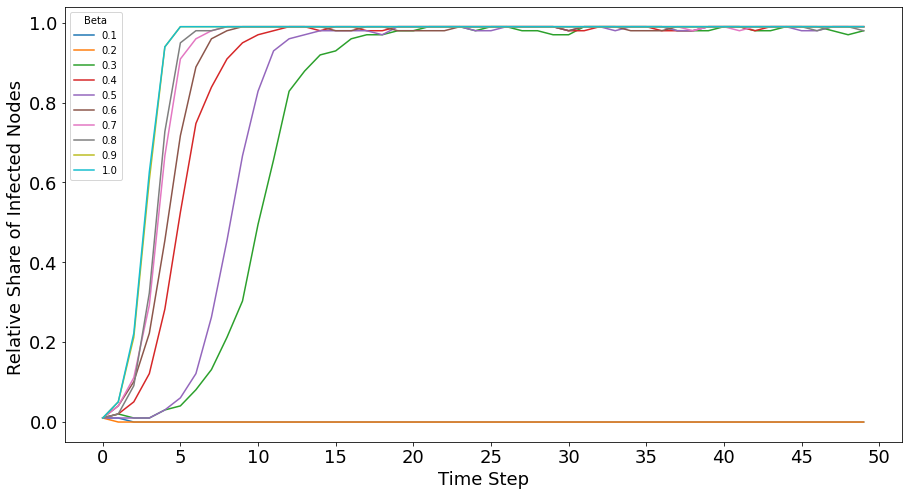

In [8]:
attr = 'state'
ER = nx.erdos_renyi_graph(100,4/99)
ER0 = initialize_graph(ER,attr)
ER0_new = nx.set_node_attributes(ER0, name = 'recover',values =0)

plt.figure(figsize=(15,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SIS_epidemic(ER0,50,beta,'state'),label=round(beta,1))
    
x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(title='Beta')
plt.ylabel('Relative Share of Infected Nodes ',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

fig = plt.gcf()
plt.show()
fig.savefig("SIS_ER.png")

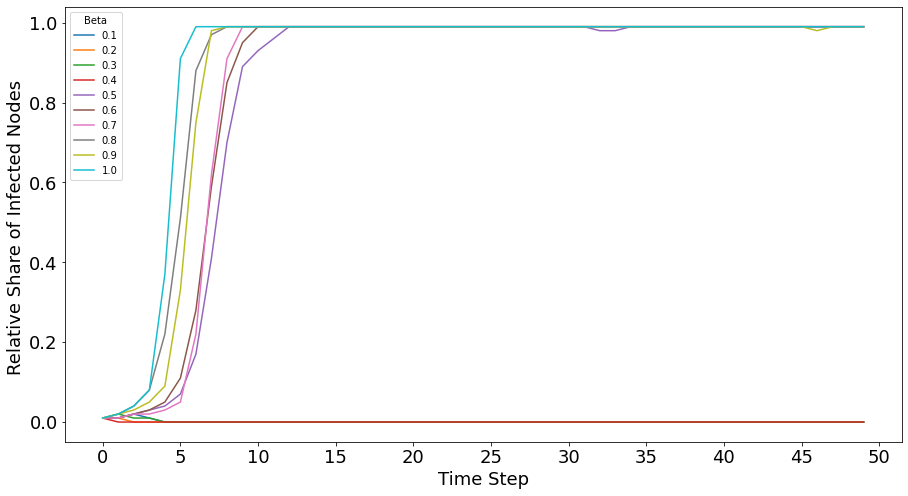

In [9]:

BA = nx.barabasi_albert_graph(100,2)
BA0 = initialize_graph(BA, attr)
BA0_new = nx.set_node_attributes(BA0, name = 'recover',values =0)

plt.figure(figsize=(15,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SIS_epidemic(BA0,50,beta,attr),label=round(beta,1))


x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(title='Beta')
plt.ylabel('Relative Share of Infected Nodes ',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

fig = plt.gcf()
plt.show()
fig.savefig("SIS_BA.png")

**A1b):** 

In the  Erdos-Renyi model, the curves with $\beta = 0.1$ and $0.2$ show that the number of infections decreases to 0 after 5 rounds. The curve with $\beta = 1$ reached the maximum number of infections the fastest and the curve with $\beta = 0.3$ reached the maximum number of infections the slowest. The rate of infection is proportional to the rate of infection in all curves except the curves with $\beta = 0.1$ and $0.2$


In the Barabasi-Albert model, as the probability of infection $\beta$ increases, the infection rate increases more and more quickly. It is important to note that when the $\beta < 0.5$, the number of infections decreases to 0 after a few rounds(less than 5 rounds) of infection because the probability of recover at the next timestep is fixed by 0.8. The probability of infection is much smaller than the probability of being recovered. When $\beta > 0.5$, the curves with probabilities of infection 0.8 and 1.0 reached the maximum number of infections the fastest, and all curves reached the maximum number of infections in less than 10 rounds.

Difference between two models:

The spread situation in BA model is faster than in ER model. In the BA model, all infections were completed within 10 rounds; however, in the ER model, there were still fluctuations in the number of infections until the 50th round.

The ER model simulates a more reasonable phenomenon because the infection rate is proportional to the number of infections; In the BA model, it is difficult to compare why the curve with $\beta = 0.8$ grows faster than the curve with $\beta = 1$

### Task 2:  Temporal Network Analysis (75 pts)

In the file home assignment task of the semester, we analyze a temporal and directed graph, namely the _UC Irvine messages_ network, which is provided as edge list in the file 'out.opsahl-ucsocial'. In this network, each node represents a person, and every directed edge represents a sent message. Every edge is also associated with a UNIX timestamp which indicates the time that the message has been sent, and in particular, there can be multiple edges between any two users - feel free to look into the README or meta-files as well.  
Other than in all previous tasks, you now have to conduct your own analyses on the network. Pick three different aspects of the network which you are most interested in, and **analyze how these aspects are influenced by the temporal nature of the network**.
To provide some examples on what you might look into, you could for instance look into how community structure changes over time, or how the degree distribution, link formation, or reciprocity is evolving over time.
However, you have to make sure that your three analyses are looking into conceptually different aspects, e.g., you will not obtain full marks if you conduct one analysis on Eigenvector centrality and one analysis on Katz centrality.

To obtain full marks, we expect the following:
* You have to clearly specify and outline what aspects you are looking into, what assumptions you make, and how you approach your analyses. For instance, if within one of your analyses you consider an edge to be existent at a certain point in time only if the last message was within the last four weeks, you should clearly specify not only that you have done this, but also why you have made this assumption. Provide these outlines for each of your respective analyses in cells __A2.1a)__, __A2.2a)__, and __A2.3a)__.
* Your code has to be structured or commented in a way that it is clear what it is doing with regard to your analyses.
* For every analysis, you have to visualize and illustrate your findings in one plot. Make sure that each of your plots is easy to read and interpret - for instance, you should not use UNIX time (but rather actual days/months) if you include a temporal axis in your plot, or if you use scatter plots for degree distributions, you should use approprate bins. Save the plots for your first, second, and third analysis into files **'P1.png'**, **'P2.png'**, and **'P3.png'**, respectively! 
* In each of your analyses, you should describe and discuss the results that you have obtained and plotted, and provide a clear conclusion of your findings. It is not important to have surprising results, however if you obtain a result which aligns with your expectations, you should put this into context and explain why your finding is not surprising. Provide these descriptions and discussions for each of your respective analyses in cells __A2.1b)__, __A2.2b)__, and __A2.3b)__.


__References:__  
[1]	UC Irvine messages network dataset -- KONECT, April 2017. [ http://konect.uni-koblenz.de/networks/opsahl-ucsocial ]  
[2]	Tore Opsahl and Pietro Panzarasa. Clustering in weighted networks. Social Networks, 31(2):155-163, 2009.


In [10]:
# general preprocessing may go here

# read the edgelist file
G = nx.read_edgelist("out.opsahl-ucsocial", create_using = nx.MultiDiGraph(), 
                     nodetype = int, comments = "%", data = [("weight",int),("time",int)])

# extract the subgraph of April (from 15.04.2004 to 30.04.2004)
subgraph_Apr = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1082008561) \
                     and (e["time"] < 1083362400))

# extract the subgraph of May (from 01.05.2004 to 30.05.2004)
subgraph_May = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1083362400) \
                     and (e["time"] < 1086040800))

# extract the subgraph of May (from 01.06.2004 to 30.06.2004)
subgraph_ju = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1086040800) \
                     and (e["time"] < 1088632800))

# extract the subgraph of May (from 01.07.2004 to 30.07.2004)
subgraph_jl = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1088632800) \
                     and (e["time"] < 1091311200))

# extract the subgraph of May (from 01.08.2004 to 30.08.2004)
subgraph_au = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1091311200) \
                     and (e["time"] < 1093989600))

# extract the subgraph of May (from 01.09.2004 to 30.09.2004)
subgraph_se = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1093989600) \
                     and (e["time"] < 1096581600))

# extract the subgraph of May (from 01.10.2004 to 26.10.2004)
subgraph_oc = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1096581600) \
                     and (e["time"] <= 1098744742))

#### Average local clustering coefficient analysis

**A2.1a):** 

We first analyse the change of the average local clustering coefficient of the graph in every month, since the earliest time is Apr 15 and the latest time Oct 26. An edge is existent if the last message was within the same month, in that way can we study how the average clustering coefficient of every month changes. We make the assumption that the local clustering coeffiecients are relatively higher in the lecture period than those in the non-lecture period. 

Since the nx.average_clustering() method is not implemented for a multigraph, we firstly transform the multigraph into a normal graph, in order to indicate the several different edges of a node, we change the weight of that single edge of the node after the transformation.


In [11]:
#-----April---------------------------------------------------------------
HA = subgraph_Apr

HAd = nx.DiGraph()
for u,v in HA.edges():
    if HAd.has_edge(u,v):
        HAd[u][v]["weight"] += 1
    else:
        HAd.add_edge(u,v,weight=1)

cl_ap = nx.average_clustering(HAd)
print("April:",cl_ap)
##########################################################################
#-----May------------------------------------------------------------------
HM = subgraph_May

HMd = nx.DiGraph()
for u,v in HM.edges():
    if HMd.has_edge(u,v):
        HMd[u][v]["weight"] += 1
    else:
        HMd.add_edge(u,v,weight=1)

cl_may = nx.average_clustering(HMd)
print("May:",cl_may)
##########################################################################
#-----June------------------------------------------------------------------
HJU = subgraph_ju

HJUd = nx.DiGraph()
for u,v in HJU.edges():
    if HJUd.has_edge(u,v):
        HJUd[u][v]["weight"] += 1
    else:
        HJUd.add_edge(u,v,weight=1)

cl_june = nx.average_clustering(HJUd)
print("June:",cl_june)
##########################################################################
#-----July-----------------------------------------------------------------
HJL = subgraph_jl

HJLd = nx.DiGraph()
for u,v in HJL.edges():
    if HJLd.has_edge(u,v):
        HJLd[u][v]["weight"] += 1
    else:
        HJLd.add_edge(u,v,weight=1)

cl_july = nx.average_clustering(HJLd)
print("July:",cl_july)
##########################################################################
#-----August---------------------------------------------------------------
HA = subgraph_au

HAd = nx.DiGraph()
for u,v in HA.edges():
    if HAd.has_edge(u,v):
        HAd[u][v]["weight"] += 1
    else:
        HAd.add_edge(u,v,weight=1)

cl_au = nx.average_clustering(HAd)
print("August:",cl_au)
##########################################################################
#-----September------------------------------------------------------------
HS = subgraph_se

HSd = nx.DiGraph()
for u,v in HS.edges():
    if HSd.has_edge(u,v):
        HSd[u][v]["weight"] += 1
    else:
        HSd.add_edge(u,v,weight=1)

cl_se = nx.average_clustering(HSd)
print("September:",cl_se)
##########################################################################
#-----October--------------------------------------------------------------
HO = subgraph_oc

HOd = nx.DiGraph()
for u,v in HO.edges():
    if HOd.has_edge(u,v):
        HOd[u][v]["weight"] += 1
    else:
        HOd.add_edge(u,v,weight=1)

cl_oc = nx.average_clustering(HOd)
print("October:",cl_oc)


April: 0.042561046915094235
May: 0.08135387172488992
June: 0.027762379285541795
July: 0.04144679345131225
August: 0.017475040686633032
September: 0.023679900347764203
October: 0.0034255202395646186


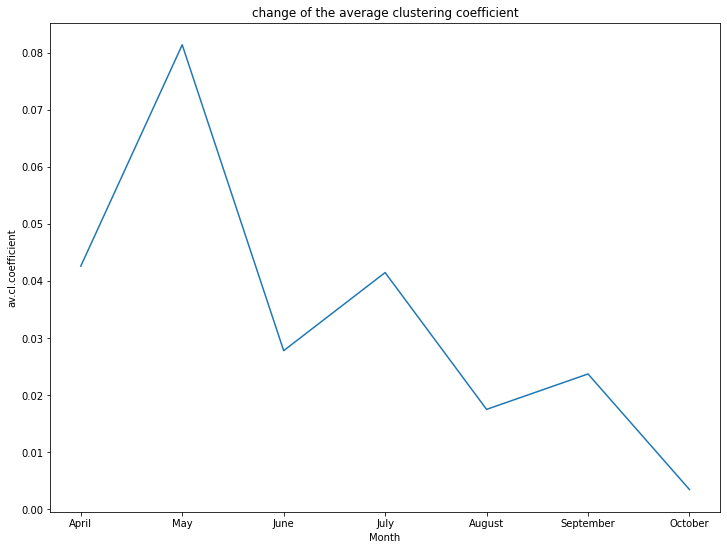

In [12]:
X = ["April","May","June","July","August","September","October" ]
Y = [cl_ap, cl_may, cl_june, cl_july, cl_au, cl_se, cl_oc ]

plt.figure(figsize = (12,9))
plt.plot(X, Y)
plt.title('change of the average clustering coefficient')
plt.xlabel('Month')
plt.ylabel('av.cl.coefficient')

fig = plt.gcf()
plt.show()
fig.savefig("P1.png")

**A2.1b):** 

As shown in the diagram, we have obviously higher av.clustering coefficient during the lecture period, which are April, May, June and July, however it gets samller and smaller in the non-lecture period(August, September and October). the statistik makes sense since the students are more likely to make new friends or contact existing friends in the campus, for example in the lecture, in the cafeteria and in the library. In the non-lecture period however, students don't have so many opportunities more to gather in the campus, that, of course reduces the chance to contact to new or existing friends.

The av. local clustring coefficient reaches its maximum in May, since only 15 days of April are counted but it still has the second highest coefficient, we can indicate that the first 2 Months have the highest av. clustering coefficient, that is perhaps because of the lower pressure of studying in the early time of a semester, as time goes by, students are more and more occupied with tasks from the uni, that kills a large amount of time to have some social contacts.


#### Degree distribution analysis

**A2.2a):** 

In this part we analyse how the degree distribution changes over time, as assumed in the last part, the change degree distribution should somehow match the change of the av. clustering coefficient. An edge is also existent if the last message was sent within the same month.


In [13]:
#------------April-------------------------
degrees4 = [subgraph_Apr.degree(n) for n in subgraph_Apr.nodes()]
#print(degrees4)

#------------May---------------------------
degrees5 = [subgraph_May.degree(n) for n in subgraph_May.nodes()]
#print(degrees5)

#------------June--------------------------
degrees6 = [subgraph_ju.degree(n) for n in subgraph_ju.nodes()]
#print(degrees6)

#------------July--------------------------
degrees7 = [subgraph_jl.degree(n) for n in subgraph_jl.nodes()]
#print(degrees7)

#------------August------------------------
degrees8 = [subgraph_au.degree(n) for n in subgraph_au.nodes()]
#print(degrees8)

#------------September---------------------
degrees9 = [subgraph_se.degree(n) for n in subgraph_se.nodes()]
#print(degrees9)

#------------October-----------------------
degrees10 = [subgraph_oc.degree(n) for n in subgraph_oc.nodes()]
#print(degrees10)

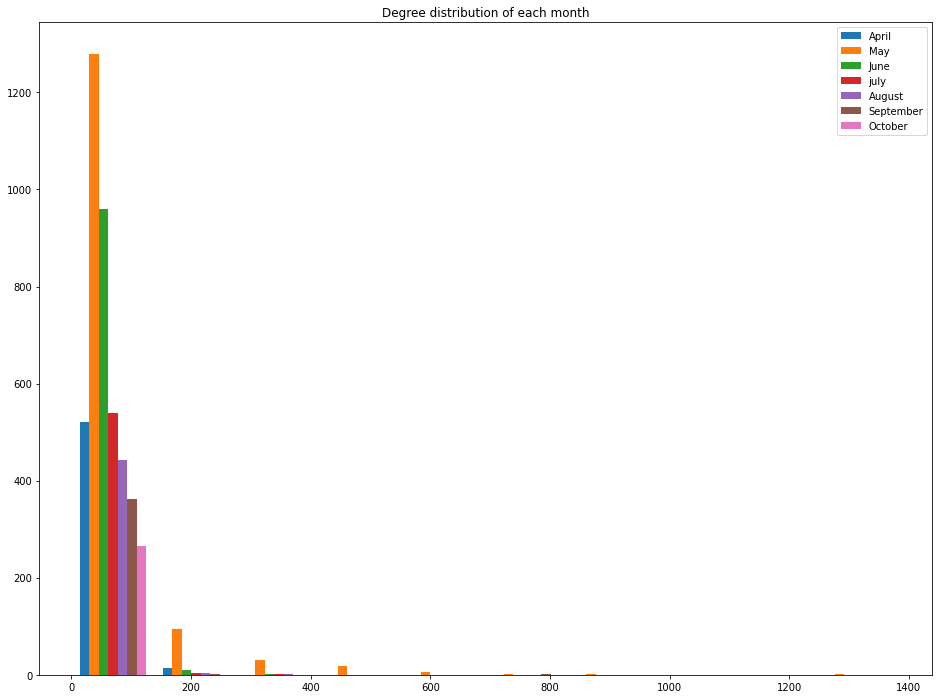

In [14]:
plt.figure(figsize = (16,12))

plt.xlabel = ('Degree')
plt.ylabel = ("Count")
plt.title("Degree distribution of each month")

plt.hist([degrees4, degrees5,degrees6,degrees7,degrees8,degrees9,degrees10], label=['April', 'May','June','july','August','September','October'])
plt.legend(loc='upper right')

fig = plt.gcf()
plt.show()
fig.savefig("P2.png")

**A2.2b):**

It is easy to observe from the diagram that the number of each degree interval reaches its maximum in May, the non-lecture period has almost the lowest number of each interval, that matches the result from our last analysis, students have more social contacts during the lecture time, especially at the beginning of the semester, as the studying pressure gets higher, social contacts get less frequently. In the non-lecture time students leave the campus, that causes lasting decrease of social contacts between students.


#### Reciprocity analysis 

**A2.3a)** 

In the third part we want to analyse how the reciprocity of the graph changes over time. We assume that the proportion of students sending messages to each other is relatively large in semesters; In non-semesters, the proportion of students sending messages to each other is small. So we caculate the the reciprocity of the subgraph of each month.

In [15]:
# calculate the reciprocity og each subgraph of each month
r_A = nx.reciprocity(subgraph_Apr)
r_M = nx.reciprocity(subgraph_May)
r_JU = nx.reciprocity(subgraph_ju)
r_JL = nx.reciprocity(subgraph_jl)
r_AU = nx.reciprocity(subgraph_au)
r_S = nx.reciprocity(subgraph_se)
r_O = nx.reciprocity(subgraph_oc)

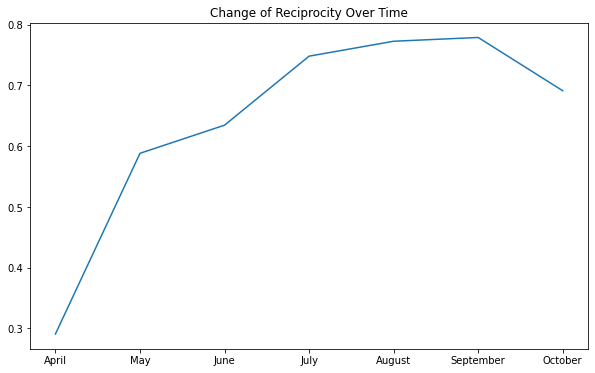

In [16]:
X = ['April',"May","June","July","August","September","October" ]
Y = [r_A,r_M, r_JU, r_JL, r_AU, r_S, r_O]

plt.figure(figsize = (10,6))
plt.plot(X, Y)
plt.title('Change of Reciprocity Over Time')
plt.xlabel = ('Time')
plt.ylabel = ('Reciprocity')

fig = plt.gcf()
plt.show()
fig.savefig("P3.png")

**A2.3b):**

As shown in Figure P3, July, August, and September had the highest reciprocity at over 0.7, meaning that over 70% of students were messaging each other between July and September. April had the lowest reciprocity, at about 0.2. After checking the website of UCI, the spring semester of the UC Irvine in 2004 was from April 5 to June 11, and the winter semester started on September 23. This is contrary to our hypothesis. Therefore, students were in contact more frequently and sent messages to each other a greater percentage of the time during non-semesters.

As shown in Fugure P2, the degree of the points in April and May is the greatest, but the reciprocity of the points in April and May is the lowest, that is, in the middle of the semester, students are in frequent contact, but the number of students sending messages to each other is low. During the non-semester period, students are less contacted, but the number of students sending messages to each other is higher. This is because, in the middle of the semester, students can easily communicate with each other face-to-face and do not need to go through social networks. However, during the non-semester period, it is not very convenient for students to meet each other and they need to contact each other frequently on social networks.